In [1]:
import os

os.chdir('..')

In [125]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
train_index = pd.read_csv("data/index/train.csv")
val_index = pd.read_csv("data/index/val.csv")
test_index = pd.read_csv("data/index/test.csv")

train_index["split"] = "train"
val_index["split"] = "val"
test_index["split"] = "test"

full_index = pd.concat([train_index, val_index, test_index])

In [102]:
# Convert train index to a list of tuples
train_index_list = list(zip(train_index["image_path"], train_index["mask_path"]))
train_index_list[:10]

[('data/images/img_0030.jpeg', 'data/masks/seg_0030.jpeg'),
 ('data/images/img_0536.jpeg', 'data/masks/seg_0536.jpeg'),
 ('data/images/img_0696.jpeg', 'data/masks/seg_0696.jpeg'),
 ('data/images/img_0558.jpeg', 'data/masks/seg_0558.jpeg'),
 ('data/images/img_0837.jpeg', 'data/masks/seg_0837.jpeg'),
 ('data/images/img_0597.jpeg', 'data/masks/seg_0597.jpeg'),
 ('data/images/img_0166.jpeg', 'data/masks/seg_0166.jpeg'),
 ('data/images/img_0919.jpeg', 'data/masks/seg_0919.jpeg'),
 ('data/images/img_0496.jpeg', 'data/masks/seg_0496.jpeg'),
 ('data/images/img_0825.jpeg', 'data/masks/seg_0825.jpeg')]

In [85]:
# Create dict mapping the int label to the corresponding class name
int_to_name_map = pd.read_csv("data/labels_mapping.csv").set_index("int_label").to_dict()["str_label"]

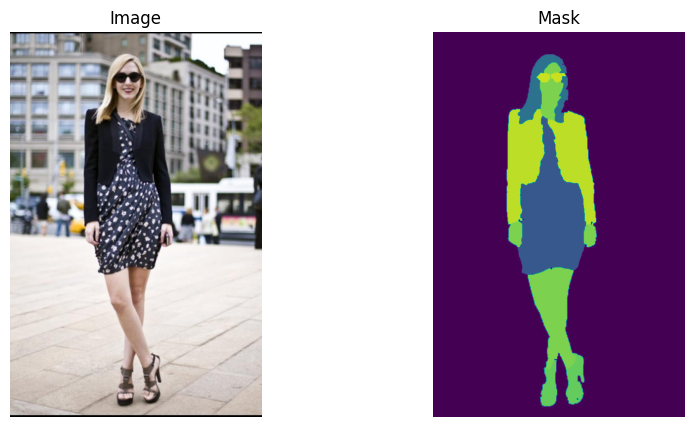

Image shape: (832, 544)


In [134]:
# Plot image with its corresponding mask for a random image in the train split
random_image = train_index.sample(1)
image_path = random_image["image_path"].values[0]
mask_path = random_image["mask_path"].values[0]

image = plt.imread(image_path)
mask = plt.imread(mask_path)
mask = np.clip(mask, 0, len(int_to_name_map) - 1)  # Some masks have values > 58, but we have 59 classes

# Resize image and mask to have height & width divisible by 32 (Neccessary for the model)
# It's sensible to visualize this as well
# Images/Masks are all 825x550, we change this to 832x544

# Resize to 832x544
image = cv2.resize(image, (544, 832), interpolation=cv2.INTER_AREA)
mask = cv2.resize(mask, (544, 832), interpolation=cv2.INTER_AREA)

print("Image shape:", image.shape[:2])

# Plot image and mask next to each other
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title("Image")
ax[0].axis("off")
ax[1].imshow(mask)
ax[1].set_title("Mask")
ax[1].axis("off")
plt.show()



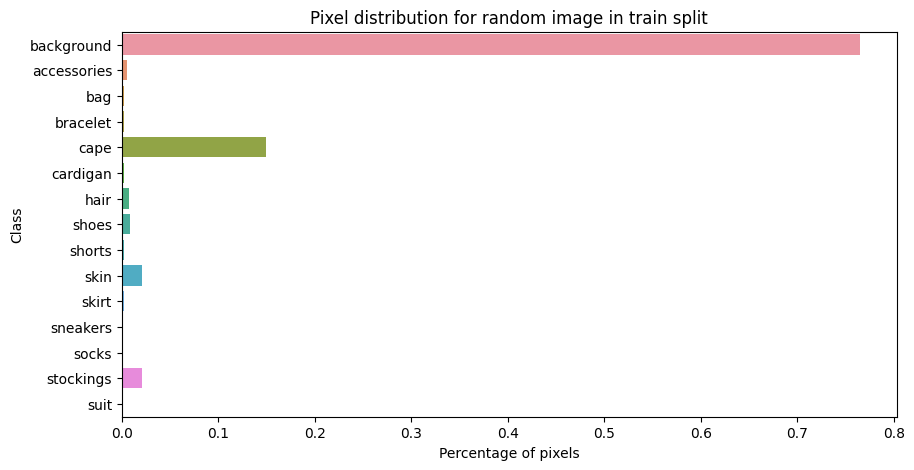

In [103]:
# Calculate the number of pixels for each class in the random_image
unique, counts = np.unique(mask, return_counts=True)
class_counts = dict(zip(unique, counts))
class_counts = {int_to_name_map[k]: v for k, v in class_counts.items()}

# Normalize the counts to get the percentage of pixels for each class
class_percentages = {k: v / sum(class_counts.values()) for k, v in class_counts.items()}

# Filter out classes with 0% of pixels
class_percentages = {k: v for k, v in class_percentages.items() if v > 0.001}

# Plot a horizontal histogram of the class percentages with seaborn
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=list(class_percentages.values()), y=list(class_percentages.keys()), ax=ax)
ax.set_xlabel("Percentage of pixels")
ax.set_ylabel("Class")
ax.set_title("Pixel distribution for random image in train split")
plt.show()